I want to understand how linear programming works.

Refs
- https://www.math.ucla.edu/~tom/LP.pdf
- https://medium.com/@jacob.d.moore1/coding-the-simplex-algorithm-from-scratch-using-python-and-numpy-93e3813e6e70
- [Visualizing and Constructing Cycles in the Simplex Method](https://www.jstor.org/stable/pdf/25147203.pdf)
- [The Geometry of the Simplex Method and Applications to the Assignment
Problems](https://www.math.ucdavis.edu/files/7013/5794/9936/CheungThesis.pdf)
- [Linear Programming: Theory and Applications](https://www.whitman.edu/Documents/Academics/Mathematics/lewis.pdf)
- https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/null-column-space/v/showing-relation-between-basis-cols-and-pivot-cols
- https://en.wikipedia.org/wiki/Linear_programming

Main questions;
- How can LP be used for RL?
- How is LP with block pivoting like policy iteration?

In [11]:
import numpy as np
import matplotlib.pyplot as plt

What is the problem we are solving?

$$
\begin{align}
\mathop{\text{max}}_x c^T \cdot x \\
\text{s.t. } Ax \le b \\
x \ge 0 \\
\end{align}
$$

For example.
Design example.

## Duals

Definition. The dual of the standard maximum problem

$$
\mathop{\text{maximize}}_x \; c^Tx \\
\text{subject to the constraints }Ax \le b \text{ and } x \ge 0
$$

is defined to be the standard minimum problem

$$
\mathop{\text{minimize}}_y \; y^Tb \\
\text{subject to the constraints }y^TA \ge c^T \text{ and } y \ge 0
$$

Is it really true that these are the same?
Is there a geometric intuition to this?

In [257]:
def generate_LP_problem(n_dims):
    A = np.random.random((n_dims, n_dims))
    b = np.random.random((n_dims, 1))
    c = np.random.random((n_dims, 1))
    return A, b, c

In [272]:
A, b, c = generate_LP_problem(2)
# so some LPs dont have a dual??? 
# or just in vastly different ranges, which is what breaks my code?

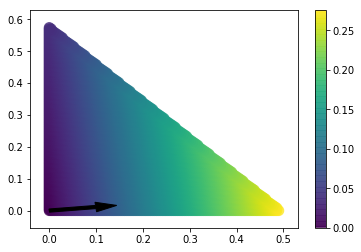

In [275]:
x = np.linspace(0, 1, 250)
X = np.stack(np.meshgrid(x, x), axis=-1).reshape(-1, 2)
xs = np.stack([x for x in X if np.less_equal(np.dot(A, x), b).all() and np.greater_equal(x, np.zeros_like(x)).all()])
z = np.squeeze(np.stack([np.dot(c.T, x) for x in xs]))
plt.scatter(xs[:,0], xs[:,1], s=100, alpha=0.75, c=z)
n = np.linalg.norm(c)*10
plt.arrow(0, 0, c[0,0]/n, c[1,0]/n, width=0.01, color='k')
plt.colorbar()

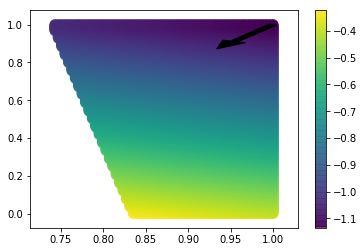

In [276]:
xs = np.stack([x for x in X if np.greater_equal(np.dot(x.T, A), c).all() and np.greater_equal(x, np.zeros_like(x)).all()])
z = -np.squeeze(np.stack([np.dot(x.T, b) for x in xs]))
n = np.linalg.norm(b)*10
plt.arrow(1, 1, -b[0,0]/n, -b[1,0]/n, width=0.01, color='k')
plt.scatter(xs[:,0], xs[:,1], s=100, alpha=0.75, c=z)
plt.colorbar()

## Pivots

Is there a geometric way to interpret pivots?

Why do we want to pivot???

In [4]:
# What does it look like when we pivot?
n = 2
A = np.random.random((n, 2))
b = np.random.random((n, 1))
c = np.random.random((n, 1))

def pivot(A: np.ndarray,
          b: np.ndarray,
          i: int, 
          j: int)  -> np.ndarray:
    """
    Ax = b
    Swap independent variable, x_i, for dependent variable, b_j.
    """
    
    return A, b

In [9]:
pivot(A, 0, 0)

array([[0.43372975, 0.13168224],
       [0.93480705, 0.76056454]])

## Simplex method



## RL

Let's pretend that $v \ge r_{\pi} + \gamma P_{\pi} v$ and pick $\alpha = \textbf 1$ then we can frame a LP.

$$
\mathop{\text{min}}_v \alpha^T v \\
\text{s.t. }  v - \gamma Pv \ge r\\
$$
$P_{\pi}$?

Cool. We can now reframe this as the dual problem.

$$
\mathop{\text{max}}_x \langle r, x \rangle_F \\
\text{s.t. } x - \lambda Px = \alpha  \\
x \ge 0 \\
$$


BUT. Value polytpes are non-convex. How does LP deal with that!?!

## Policy iteration and block pivoting

And. I want to understand on comment made in [Optimally solving MDPs with ...](https://dl.acm.org/citation.cfm?id=2822923.2823133).

> Theorem 1: Kallenberg (1983). The policy iteration algorithm is equivalent to the block-pivoting simplex algorithm (pivoting one action for each state) for solving the dual linear problem.

So this implies to me that they have the same properties. 
What allows us to jump between edges? How many potential solutions does this rule out?
How do we know the right edge to jump to?

- Ok. So how do we accelerate the search for sparse problems?